# 2D Decision Integrator

This is a model of perceptual decision making using a two dimensional integrator. As
mentioned in the book, the goal is to construct a simple model of perceptual decision
making without being concerned with establishing how good or bad it is.

Rather than having two different integrators for each dimension, you will build the
model using a single two dimensional integrator. This integrator can be used
irrespective of the task demands since it effectively integrates in every direction
simultaneously. This is neurally more efficient due to the reasons explained in the
book.

In [1]:
# Setup the environment
import nengo
from nengo.processes import WhiteNoise
from nengo.dists import Uniform

## Create the Model

The model has four ensembles: `MT` representing the motion area, `LIP` representing the
lateral intraparietal area, `input` and `output` of the 2D integrator. The parameters
used
in the model are as described in the book. The 2D integrator resides in `LIP`. As
discussed in the book an integrator requires two connections: here, the input from `MT`
to
`LIP` and the feedback connection from `LIP` to `LIP`.

Here, you will provide a an input of (-0.5, 0.5) to the model spanning over a period of
6 seconds to observe the model behaviour. In order to inject noise while the simulation
runs, you can use the `noise` parameter when creating ensembles as shown. The reason for
injecting noise is explained in the book.

In [2]:
# Create the network object to which we can add ensembles, connections, etc.
model = nengo.Network(label="2D Decision Integrator", seed=11)

with model:
    # Inputs
    input1 = nengo.Node(-0.5, label="Input 1")
    input2 = nengo.Node(0.5, label="Input 2")

    # Ensembles
    ens_inp = nengo.Ensemble(100, dimensions=2, label="Input")
    MT = nengo.Ensemble(100, dimensions=2, noise=WhiteNoise(dist=Uniform(-0.3, 0.3)))
    LIP = nengo.Ensemble(200, dimensions=2, noise=WhiteNoise(dist=Uniform(-0.3, 0.3)))
    ens_out = nengo.Ensemble(
        100,
        dimensions=2,
        intercepts=Uniform(0.3, 1),
        noise=WhiteNoise(dist=Uniform(-0.3, 0.3)),
        label="Output",
    )

    weight = 0.1
    # Connecting the input signal to the input ensemble
    nengo.Connection(input1, ens_inp[0], synapse=0.01)
    nengo.Connection(input2, ens_inp[1], synapse=0.01)

    # Providing input to MT ensemble
    nengo.Connection(ens_inp, MT, synapse=0.01)

    # Connecting MT ensemble to LIP ensemble
    nengo.Connection(MT, LIP, transform=weight, synapse=0.1)

    # Connecting LIP ensemble to itself
    nengo.Connection(LIP, LIP, synapse=0.1)

    # Connecting LIP population to output
    nengo.Connection(LIP, ens_out, synapse=0.01)

## Run the Model

In [ ]:
# Import the nengo_gui visualizer to run and visualize the model.
from nengo_gui.ipython import IPythonViz

IPythonViz(model, "ch8-2d-decision-integrator.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs
as shown in the figure below.

The `output` plot on the bottom-right shows the output of the 2D decision integrator
which is represented by a single two dimensional output ensemble. You can see that as
`MT`
encodes the input over time, `LIP` slowly moves towards the same direction as it
acuumulates evidence that there is sustained motion in that direction.

Thus `MT` moves `LIP` in the right direction and once past a certain threshold, the
output
neurons start firing. To visualize this:
<br>1) Select "spikes" from the right-click menu of the `output` ensemble. This will
display a spike plot.
<br>2) Run the simulation and then slide the blue box in the simulation control bar
backwards.
<br>3) You will see that the spikes become stronger once past a certain threshold (i.e.,
when `LIP` starts following `MT`)

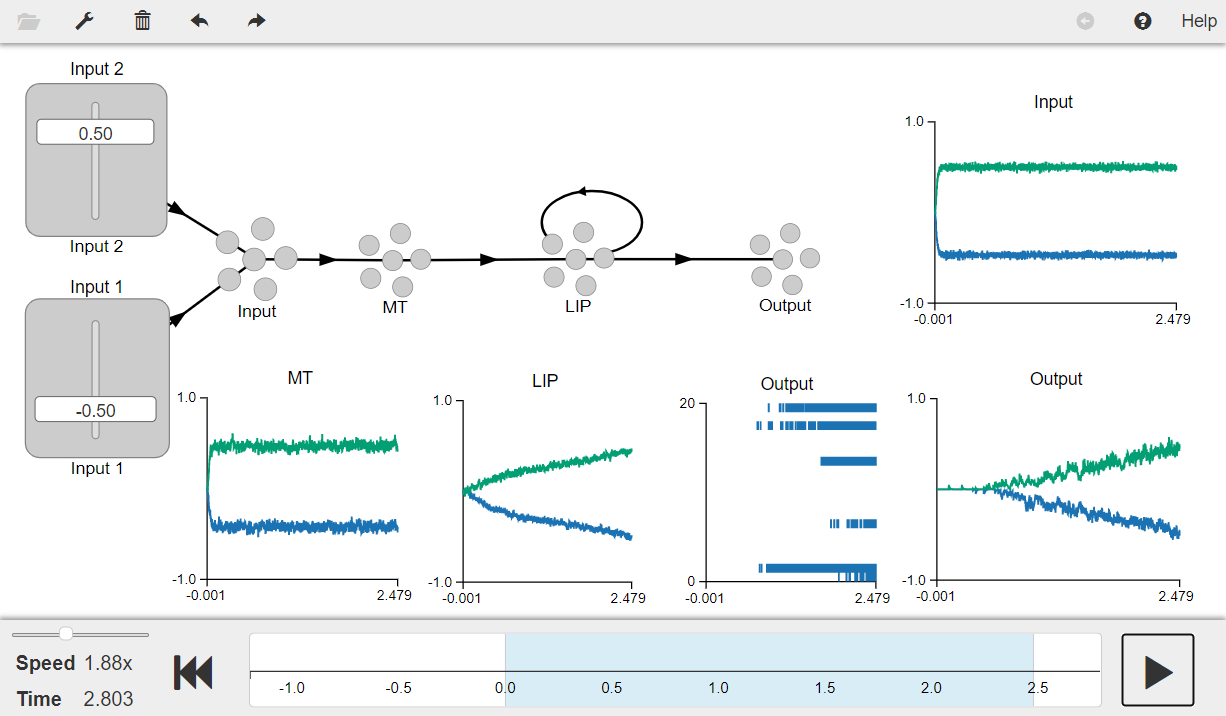

In [3]:
from IPython.display import Image

Image(filename="ch8-2d-decision-integrator.png")